# Wrangle and Analyze Data - WeRateDogs

## Table of Contents
- [I.Introduction](#intro)
- [II.Gathering Data](#gather)
- [III.Assessing Data](#assess)
- [IV.Cleaning Data](#clean)
- [V.Analyzing Data & Visualization](#analyze)


<a id='intro'></a>
## I. Introduction

This project is aimed to practice the skills of data wrangling using real-world data. Data wrangling process consists three parts: gather, assess and clean. The dataset for this project is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. First, I'll gather data in different format from different sources. Then I'll assess the data both visually and programmatically to identify any data quality issues and tidiness issues. After that, I'll do programmatical cleaning to fix all the issues. Then I'll analyze the cleaned dataset and visualize the results.  

<a id='gather'></a>
## II. Gathering Data

Gather each of the three pieces of data from different sources:
- WeRateDogs Twitter archive: provided to the project `twitter_archive_enhanced.csv`
- Tweet image predictions:`image_predictions.tsv` downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- Twitter API for retweet count and favorite count: `tweet_json.txt` downloaded programmatically using the Requests library and the following URL: https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt

To get started, let's import our libraries. 

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

### 1. WeRateDogs Twitter Archive

In [2]:
# Read CSV file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### 2. Tweet Image Predictions

In [3]:
# Download file using Requests library via URL provided 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# Save the file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Twitter API 

In [5]:
# Download file using Requests library via URL provided 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

# Save the file
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [6]:
# Read downloaded txt file line by line into a pandas DataFrame
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess'></a>
## III. Assessing Data

I'll assess the data both visually and programmatically to identify any data quality(content) issues and tidiness(structual) issues. 

Data quality dimensions:
- Completeness
- Validity
- Accuracy
- Consistency

Tidy data requirements:
- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table

### twitter_archive table

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_archive.duplicated().sum()

0

In [11]:
twitter_archive.tweet_id.duplicated().sum()

0

In [12]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [18]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**Observations:**
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are float, should all be int
- only need original ratings with pictures, retweets and replies entries should be removed, , related columns should be removed too. The picture part will be fixed later.
- timestamp is str, should be datetime, remove +0000 in timestamp
- doggo, floofer, pupper, puppo are all stages of dog, should be in one column
- abnormal values in rating_denominator, e.g., 170, 150, 130, etc. The rating_denominator is almost always 10
- abnormal values in rating_numerator, e.g., 1776, 960, 666, 204, 165,etc. make no sense. 
- source info redundent, not easy to read

### image_prediction table

In [19]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
image_prediction.tweet_id.duplicated().sum()

0

In [23]:
image_prediction.jpg_url.duplicated().sum()

66

In [24]:
image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
hare                    1
picket_fence            1
suit                    1
washer                  1
hand_blower             1
Name: p1, Length: 378, dtype: int64

In [25]:
image_prediction.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
paper_towel             1
lesser_panda            1
affenpinscher           1
waffle_iron             1
Kerry_blue_terrier      1
Name: p2, Length: 405, dtype: int64

In [26]:
image_prediction.p3.value_counts()

Labrador_retriever          79
Chihuahua                   58
golden_retriever            48
Eskimo_dog                  38
kelpie                      35
                            ..
orangutan                    1
jaguar                       1
European_fire_salamander     1
conch                        1
restaurant                   1
Name: p3, Length: 408, dtype: int64

**Obervatoins:**

- inconsistent capitalization in p1, p2 and p3 columns
- jpg url duplicates
- many entries are not dogs, e.g., jaguar, mailbox, peacock, cloak, etc. 
- should be part of the twitter_archive table
- we only need the most confident prediction for dog breed for this analysis

### tweet_json table

In [27]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [28]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [29]:
tweet_json.duplicated().sum()

0

**Observations:**
- should be part of the twitter_archive table
- missing data probably due to retweets in twitter_archive

### Observation Summary:

#### Quality
##### `twitter_archive` table
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are float, should all be str
- only need original ratings with pictures, retweets and replies entries should be removed, related columns should be removed too. The picture part will be fixed later.
- timestamp is str, should be datetime, remove +0000 in timestamp
- abnormal values in rating_denominator, e.g., 170, 150, 130, etc. The rating_denominator is almost always 10
- abnormal values in rating_numerator, e.g., 1776, 960, 666, 204, 165,etc. make no sense. 
- source info redundent, not easy to read


##### `image_prediction` table
- inconsistent capitalization in p1, p2 and p3 columns
- jpg url duplicates
- many entries are not dogs, e.g., jaguar, mailbox, peacock, cloak, etc.
- we only need the most confident prediction for dog breed for this analysis

##### `tweet_json` table
- missing data probably due to retweets in twitter_archive

#### Tidiness
- `twitter_archive`: doggo, floofer, pupper, puppo are all stages of dog, should be in one column
- The three tables should be combined into one since they're all related to the same type of observational unit according to tidy data requirements. 

<a id='clean'></a>
## IV.Cleaning Data

The programmatic data cleaning process:

- Define: convert our assessments into defined cleaning tasks. 
- Code: convert those definitions to code and run that code.
- Test: test the dataset, visually or with code, to make sure the cleaning operations worked.



In [30]:
# Make copys for all the data
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### Quality Issues

#### 1. `twitter_archive`: we only want original ratings, delete retweets and replies

##### Define
Use `isnull()` to filter and only keep rows where *retweeted_status_id* column is NaN. Same method applies to *in_reply_to_status_id*

##### Code

In [31]:
# Remove retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

# Remove replies
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

##### Test

In [32]:
twitter_archive_clean.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### 2. `twitter_archive`: drop columns that are related to retweets and replies. After dropping those columns, datatype issue with those columns will no longer be an issue 

##### Define
Use `df.drop` to delete *in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp* columns.

##### Code

In [33]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'],axis=1)

##### Test

In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### 3. `twitter_archive`: datatype for timestamp should be datetime, remove +0000

##### Define
Remove +0000 and use `pd.to_datetime` to convert *timestamp* from str to datetime

##### Code

In [35]:
# Remove +0000
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.str[:-6]

# Convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [36]:
twitter_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### 4. `twitter_archive`: redundant source information,  replace the long url with different category names

##### Define
Use `replace` to replace the url with short category names

##### Code

In [37]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [38]:
twitter_archive_clean.source = twitter_archive_clean.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
                                                                     '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
                                                                     '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
                                                                     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'})

##### Test

In [39]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### 5. `image_prediction`: delete entries that are not dogs. Same with  `twitter_archive` and  `tweet_json`. Many abnormal rating values would be gone, making it easier to fix abnormal rating issues in rating_denominator and rating_numerator.

##### Define
use `isin` and `~` to filter and delete rows that are False in *p1_dog, p2_dog, p3_dog* column in all three dataframes.

##### Code

In [40]:
# Number of rows before data cleaning
print(image_prediction_clean.shape)
print(twitter_archive_clean.shape)
print(tweet_json_clean.shape)

(2075, 12)
(2097, 12)
(2354, 3)


In [41]:
# Filter posts that are not dogs and put those tweet_id into a drop_list
image_prediction_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id
drop_list = image_prediction_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

# Drop the rows with tweet_id in the drop_list in all dataframes
image_prediction_clean = image_prediction_clean[~image_prediction_clean.tweet_id.isin(drop_list)]
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(drop_list)]
tweet_json_clean = tweet_json_clean[~tweet_json_clean.tweet_id.isin(drop_list)]

##### Test

In [42]:
# Number of rows after data cleaning
print(image_prediction_clean.shape)
print(twitter_archive_clean.shape)
print(tweet_json_clean.shape)

(1751, 12)
(1792, 12)
(2031, 3)


#### 6. `twitter_archive`: abnormal values in rating_denominator. According to the project overview, the ratings almost always have a denominator of 10. Many abnormal rating values were gone after removing ratings not for dogs, making it easier to fix abnormal rating. After investigating further, I found that tweets with denominator not equal to 10 are usually multiple dogs.

##### Define
Create new dataframe with *tweet_id, text, rating_numerator, rating_denominator* columns. Filter rating_denominator not equal to 10 and check the text to correct these ratings.

##### Code

In [43]:
# Create new dataframe with selected columns
df_abnormal_rating = twitter_archive_clean[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

# Filter rating_denominator not equal to 10
df_abnormal_denominator = df_abnormal_rating.query('rating_denominator != 10')

# Display full text
pd.set_option('display.max_colwidth', -1)

df_abnormal_denominator

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [44]:
# Correct ratings by reading through the text, most of the abnormal ratings are associated with multiple dogs.
# tweet_id: 666287406224695296
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10
# tweet_id: 697463031882764288 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 697463031882764288, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 697463031882764288, 'rating_denominator'] = 10
# tweet_id: 684222868335505415 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 684222868335505415, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 684222868335505415, 'rating_denominator'] = 10
# tweet_id: 682962037429899265 
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10
# tweet_id: 710658690886586372 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 710658690886586372, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 710658690886586372, 'rating_denominator'] = 10
# tweet_id: 713900603437621249 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 713900603437621249, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 713900603437621249, 'rating_denominator'] = 10
# tweet_id: 709198395643068416 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 709198395643068416, 'rating_numerator'] = 9
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 709198395643068416, 'rating_denominator'] = 10
# tweet_id: 722974582966214656 
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10
# tweet_id: 716439118184652801
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10
# tweet_id: 704054845121142784 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 704054845121142784, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 704054845121142784, 'rating_denominator'] = 10
# tweet_id: 677716515794329600 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 677716515794329600, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 677716515794329600, 'rating_denominator'] = 10
# tweet_id: 675853064436391936 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 675853064436391936, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 675853064436391936, 'rating_denominator'] = 10
# tweet_id: 810984652412424192  no rating
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 810984652412424192, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 810984652412424192, 'rating_denominator'] = 10
# tweet_id: 820690176645140481 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 820690176645140481, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 820690176645140481, 'rating_denominator'] = 10
# tweet_id: 731156023742988288 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 731156023742988288, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 731156023742988288, 'rating_denominator'] = 10
# tweet_id: 758467244762497024 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 758467244762497024, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 758467244762497024, 'rating_denominator'] = 10
# tweet_id: 740373189193256964
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10

##### Test

In [45]:
twitter_archive_clean.rating_denominator.value_counts()

10    1792
Name: rating_denominator, dtype: int64

#### 7. `twitter_archive`: abnormal values in rating_numerator.  Many abnormal rating values were gone after removing ratings not for dogs.

##### Define
- Use `value_counts` to see abnormal values and check the text to correct the ratings.
- Use `isin` and `~` to remove entires that are not dogs

##### Code

In [46]:
twitter_archive_clean.rating_numerator.value_counts()

12    464
10    380
11    379
13    256
9     136
8     71 
7     31 
14    27 
6     16 
5     15 
4     6  
3     5  
2     2  
75    1  
27    1  
26    1  
0     1  
Name: rating_numerator, dtype: int64

In [47]:
# rating_numerator 75, 26, 27, 0
df_abnormal_rating.query('rating_numerator == 75 or rating_numerator == 26 or rating_numerator == 27 or rating_numerator == 0')

,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [48]:
# Correct the ratings
# tweet_id: 786709082849828864, rating _numberator should be 9.75 according to the text
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75
# tweet_id: 680494726643068929, rating _numberator should be 11.26 according to the text
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26
# tweet_id: 778027034220126208, rating _numberator should be 11.27 according to the text
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27
# tweet_id: 835152434251116546
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 835152434251116546, 'rating_numerator'] = 11
# tweet_id: 883482846933004288
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 883482846933004288, 'rating_numerator'] = 13.5

In [49]:
# rating_numerator 3 and 4
df_abnormal_rating.query('rating_numerator == 3 or rating_numerator == 4')

,tweet_id,text,rating_numerator,rating_denominator
765,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10
1004,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,4,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1189,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3,10
1249,711306686208872448,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3,10
1303,707420581654872064,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,4,10
1701,680940246314430465,This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS,4,10
1938,673906403526995968,Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t.co/t5rQHl6W8M,3,10
2070,671122204919246848,Two miniature golden retrievers here. Webbed paws. Don't walk very efficiently. Can't catch a tennis ball. 4/10s https://t.co/WzVLdSHJU7,4,10
2183,668989615043424256,This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX,3,10


**rating_numerator = 3, not dog, delete**
- 777885040357281792: 
- 718246886998687744: 
- 673906403526995968: 

**rating_numerator = 4, not dog, delete**
- 707420581654872064
- 680940246314430465
- 671122204919246848
- 667176164155375616
- 666649482315059201 	

In [50]:
# Remove entries that are not dogs
id_list = [777885040357281792, 718246886998687744, 673906403526995968, 707420581654872064, 680940246314430465, 671122204919246848, 667176164155375616, 666649482315059201]
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(id_list)]

##### Test

In [51]:
twitter_archive_clean.rating_numerator.value_counts()

12.00    464
10.00    380
11.00    380
13.00    256
9.00     136
8.00     71 
7.00     31 
14.00    27 
6.00     16 
5.00     14 
3.00     2  
2.00     2  
9.75     1  
11.26    1  
4.00     1  
13.50    1  
11.27    1  
Name: rating_numerator, dtype: int64

**Limitation:** there are still other rating issues, for example some rating are not for dogs even after removing many entries in the image prediction table. It's not practical to read each of these. 

#### 8. `image_prediction`: we only need the most confident prediction for the image

##### Define
- Create two columns *breed, confident_level*
- Create a function to look through the preditions and find the most confident prediction that is a dog breed. p1 is the most confident prediction, followed by p2 and p3
- Remove other columns not needed. 

##### Code

In [52]:
# Create a breed column and a confident_level column
breed = []
confident_level = []

# Create a function to find the most confident prediction that is a dog breed
# p1 is the most confident prediction, followed by p2 and p3
def image_pred(image_prediction_clean):
    if image_prediction_clean.p1_dog == True:
        breed.append(image_prediction_clean.p1)
        confident_level.append(image_prediction_clean.p1_conf)
    elif image_prediction_clean.p2_dog == True:
        breed.append(image_prediction_clean.p2)
        confident_level.append(image_prediction_clean.p2_conf)
    elif image_prediction_clean.p3_dog == True:
        breed.append(image_prediction_clean.p3)
        confident_level.append(image_prediction_clean.p3_conf)
    else:
        breed.append('Unknown_breed')
        confident_level.append(0)
        
# Apply the function by column        
image_prediction_clean.apply(image_pred, axis=1)

# Add the breed and confident_level column to image_prediction_clean 
image_prediction_clean['breed'] = breed
image_prediction_clean['confident_level'] = confident_level

# Drop columns no longer needed
image_prediction_clean = image_prediction_clean.drop(['img_num',
                                                      'p1','p1_conf','p1_dog',
                                                      'p2','p2_conf','p2_dog',
                                                      'p3','p3_conf','p3_dog'],axis=1)

##### Test

In [53]:
image_prediction_clean.head()

,tweet_id,jpg_url,breed,confident_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


#### 9. `image_prediction`: inconsistent capitalization in p1 column

##### Define
Use `str.capitalize` to capitalize the first letter 

##### Code

In [54]:
image_prediction_clean.breed = image_prediction_clean.breed.str.capitalize()

##### Test

In [55]:
image_prediction_clean.head(10)

,tweet_id,jpg_url,breed,confident_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,Golden_retriever,0.775930


### Tidiness

#### 1. `twitter_archive`: doggo, floofer, pupper, puppo are all stages of dog, should be in one column

##### Define
Use `pd.melt` to melt the *doggo, floofer, pupper* and *puppo* columns to a *type* and *dog_stage* column. Drop the intermediate column.

##### Code

In [56]:
# Melt the doggo, floofer, pupper and puppo columns to type and dogs_stage column
twitter_archive_clean = pd.melt(twitter_archive_clean, 
                                id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'type', 
                                value_name = 'dog_stage')

# Drop type column  
twitter_archive_clean.drop('type', 1, inplace = True)

# Sort by dog_stage and drop duplicates
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

##### Test

In [57]:
twitter_archive_clean.dog_stage.value_counts()

None       1494
pupper     194 
doggo      63  
puppo      23  
floofer    10  
Name: dog_stage, dtype: int64

#### 2. tweet_json should be part of the `twitter_archive` table

##### Define
Merge the *retweet_count, favorite_count* column to the `twitter_archive` table, joining on *tweet_id* .

##### Code

In [58]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean,
                            on = ['tweet_id'], how = 'left')

##### Test

In [59]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,10,a,None,102,273
1,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7.0,10,None,None,242,559
2,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9.0,10,Philippe,None,294,565
3,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11.0,10,Hall,None,231,563
4,667509364010450944,2015-11-20 01:06:48,Twitter Web Client,This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12.0,10,None,None,2272,7148


#### 3. image_prediction should be part of the `twitter_archive` table. Since we only want original ratings that have images, only keep rows with images.

##### Define
- Use `merge` to merge the *image_prediction* table to the `twitter_archive` table, joining on *tweet_id*.
- Use `notnull` to filter nonnull rows and only keep nonnull rows.

##### Code

In [60]:
# Merge tables
twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean,
                            on = ['tweet_id'], how = 'left')

# number of null values before cleaning
twitter_archive_clean.jpg_url.isnull().sum()

126

In [61]:
twitter_archive_clean = (twitter_archive_clean[twitter_archive_clean.jpg_url.notnull()])

##### Test

In [62]:
# number of null values after cleaning
twitter_archive_clean.jpg_url.isnull().sum()

0

### View and store the clean dataframe

In [63]:
# View the dataframe
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confident_level
0,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,10,a,None,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy_poodle,0.304175
1,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7.0,10,None,None,242,559,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,Borzoi,0.852088
2,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9.0,10,Philippe,None,294,565,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957
3,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11.0,10,Hall,None,231,563,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,Labrador_retriever,0.996709
4,667509364010450944,2015-11-20 01:06:48,Twitter Web Client,This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12.0,10,None,None,2272,7148,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,Beagle,0.636169


In [64]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1783
Data columns (total 14 columns):
tweet_id              1658 non-null int64
timestamp             1658 non-null datetime64[ns]
source                1658 non-null object
text                  1658 non-null object
expanded_urls         1658 non-null object
rating_numerator      1658 non-null float64
rating_denominator    1658 non-null int64
name                  1658 non-null object
dog_stage             1658 non-null object
retweet_count         1658 non-null int64
favorite_count        1658 non-null int64
jpg_url               1658 non-null object
breed                 1658 non-null object
confident_level       1658 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 194.3+ KB


In [65]:
# Store the clean dataframe in a CSV file named twitter_archive_master.csv
twitter_archive_clean.to_csv('twitter_archive_master.csv')

# load data to a dataframe
df = pd.read_csv('twitter_archive_master.csv')

<a id='analyze'></a>
## V.Analyzing Data & Visualization

### 1. Popular dog breeds based on:
- number of original tweets
- number of total retweets
- number of total favorite

In [66]:
df.breed.value_counts()

Golden_retriever      156
Labrador_retriever    106
Pembroke              94 
Chihuahua             88 
Pug                   62 
                      .. 
Entlebucher           1  
Irish_wolfhound       1  
Silky_terrier         1  
Clumber               1  
Japanese_spaniel      1  
Name: breed, Length: 113, dtype: int64

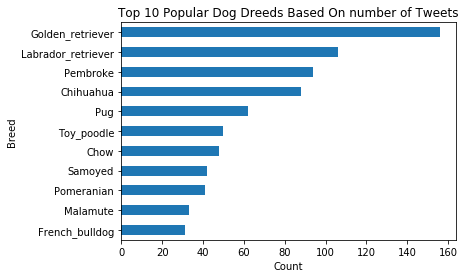

In [67]:
# Plot bar chart for top 10 popular breeds based on number of posts
df.breed.value_counts()[10::-1].plot(kind = 'barh', title = 'Top 10 Popular Dog Dreeds Based On number of Tweets')
plt.xlabel('Count')
plt.ylabel('Breed');

**We've cleaned the image_prediction data to keep tweets only for dogs. From the graph, we can clearly see that Golden retriever is the most popular dog breed with 156 tweets. Labrador_retriever is the second popular breed with 106 tweets. The next three breeds are Pembroke (94), Chihuahua (88) and Pug(62) followed by other breeds in descending order. We'll then plot to see popular dog breeds based on number of retweets and favorites.** 

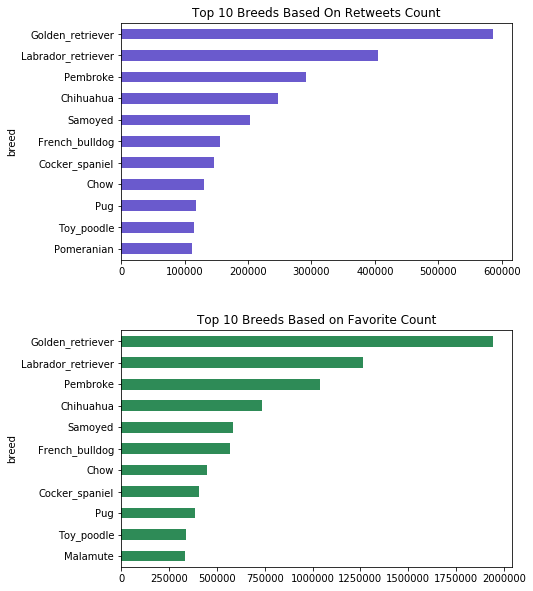

In [68]:
# Data to plot
columns = ['breed', 'retweet_count', 'favorite_count']
df_breed = df[columns]

breed_retweet = df_breed.groupby('breed')['retweet_count'].agg('sum').sort_values(ascending=False)[10::-1]
breed_favorite = df_breed.groupby('breed')['favorite_count'].agg('sum').sort_values(ascending=False)[10::-1]

# Plot horizontal bar chart
fig, (ax1, ax2) = plt.subplots(2, 1)

# Top 10 breeds based on number of retweets
breed_retweet.plot.barh(ax=ax1, figsize=(7,10), color='#6A5ACD')
ax1.set_title("Top 10 Breeds Based On Retweets Count")

# Top 10 breeds based on number of favorite
breed_favorite.plot.barh(ax=ax2, color='#2E8B57')
ax2.set_title("Top 10 Breeds Based on Favorite Count")

fig.subplots_adjust(hspace=0.3)

**Top 10 popular breeds based on tweet count are: Golden retriever, Labrador retriever, Pembroke, Chihuahua, Pug, Toy poodle, Chow, Samoyed. Pomeranian, Malamute and Chesapeake Bay retriever in descending order. Top 10 breeds based on retweets count are: Golden retriever, Labrador retriever, Pembroke, Chihuahua, Samoyed, French bulldog, Cocker spaniel, Chow, Pug, Toy poodle and Pomeranian. Top 10 breeds based on favorite count are very similar to retweet count(except 5th: French bulldog, 6th : Chow, 7th: Cocker spaniel,  10th: Malamute) probably due to the possible correlation between retweets and favorite since people who retweet are likely to click favorite.  The three graphs demonstrate the same pattern that golden retriever, Labrador retriever, Pembroke, and Chihuahua are the top four popular breeds of dogs with Golden retriever being our No.1 popular dog in all standard.** 

### 2. What is the most common dog stage?

In [69]:
# Dog stage and count
df.dog_stage.value_counts(normalize=True)

None       0.844994
pupper     0.104343
doggo      0.032569
puppo      0.013269
floofer    0.004825
Name: dog_stage, dtype: float64

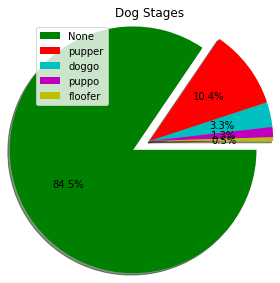

In [70]:
# Plot pie chart
labels = ['None', 'pupper', 'doggo', 'puppo', 'floofer']
values = df.dog_stage.value_counts(normalize=True)
colors = ['g', 'r', 'c' ,'m', 'y']
explode = (0.2, 0, 0, 0, 0)

plt.pie(values, colors=colors, explode=explode, autopct='%1.1f%%', radius = 1.3, shadow=True, counterclock=False)
plt.legend(labels, loc=0)
plt.title('Dog Stages')
plt.tight_layout()

**From the pie chart we can see that more than 80% of the tweets do not provide dog stage information in the post. For those have the stage information, pupper is most common stage among all those tweets.**

### 3. Rating numerator

**Since rating denominator is almost always 10 and we've cleaned the dataset, we'll focus on rating numerator here.**

In [71]:
df.rating_numerator.value_counts()

12.00    424
10.00    361
11.00    359
13.00    222
9.00     133
8.00     68 
7.00     31 
14.00    22 
6.00     16 
5.00     13 
2.00     2  
3.00     2  
11.26    1  
13.50    1  
9.75     1  
4.00     1  
11.27    1  
Name: rating_numerator, dtype: int64

In [72]:
df.rating_numerator.describe()

count    1658.000000
mean     10.868384  
std      1.683681   
min      2.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: rating_numerator, dtype: float64

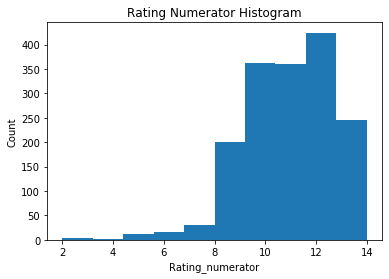

In [73]:
plt.hist(df.rating_numerator)
plt.title('Rating Numerator Histogram')
plt.xlabel('Rating_numerator')
plt.ylabel('Count');

**As we can see that the most common ratings are 12 with 424 tweets, 10.00(361 tweets), 11.00(359 tweets), 13(222 tweets), 9.00(133 tweets). The average rating is 10.87.**

### 4. Average ratings for popular dog breeds based on tweet count

In [74]:
# Make a list of top popular dog breeds based on number of tweets
top_tweet_count = df.breed.value_counts().sort_values(ascending=False).nlargest(10).rename_axis('dog_breed').reset_index(name='tweet_counts')
breed_list = top_tweet_count.dog_breed.tolist()

# Average rating for top breeds based on number of tweets
avg_rating = df.groupby('breed').rating_numerator.mean().sort_values(ascending=False).rename_axis('breed').reset_index(name='avg_rating')
breed_avg_rating = avg_rating[avg_rating['breed'].isin(breed_list)]

breed_avg_rating

,breed,avg_rating
10,Samoyed,11.690476
11,Golden_retriever,11.612179
15,Pembroke,11.425532
16,Chow,11.416667
28,Labrador_retriever,11.198113
37,Toy_poodle,11.000000
47,Pomeranian,10.945122
51,Malamute,10.878788
61,Chihuahua,10.693182
78,Pug,10.241935


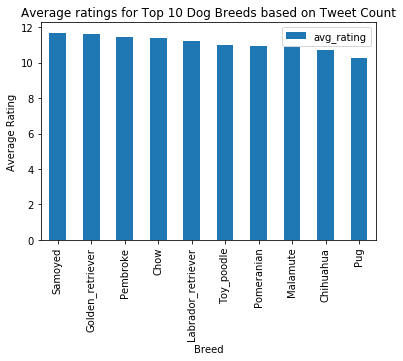

In [75]:
# Plot chart
breed_avg_rating.plot(kind='bar', x='breed', y='avg_rating')  
plt.title('Average ratings for Top 10 Dog Breeds based on Tweet Count')
plt.ylabel("Average Rating")
plt.xlabel("Breed");

**We can see that the rating for popular dogs are very similar to each other.**

### 5. Source

In [76]:
df.source.value_counts()

Twitter for iPhone    1627
Twitter Web Client    22  
TweetDeck             9   
Name: source, dtype: int64

In [77]:
df.source.value_counts(normalize=True)

Twitter for iPhone    0.981303
Twitter Web Client    0.013269
TweetDeck             0.005428
Name: source, dtype: float64

**We can see that the majority of users are iphone users(98%).**

## References

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
<br>https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.notnull.html
<br>https://stackoverflow.com/questions/45035929/creating-new-pandas-dataframe-from-certain-columns-of-existing-dataframe
<br>https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin
<br>https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
<br>https://stackoverflow.com/questions/43269548/pandas-how-to-remove-rows-from-a-dataframe-based-on-a-list
<br>https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum
<br>https://www.w3schools.com/tags/ref_colornames.asp
<br>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nlargest.html
<br>https://stackoverflow.com/questions/52436394/how-to-convert-a-pandas-value-counts-into-a-python-list/52436410
<br>https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
<br>https://stackoverflow.com/questions/48258994/how-to-select-two-columns-to-plot-with-dataframe